# Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_excel("htwt.xlsx")
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


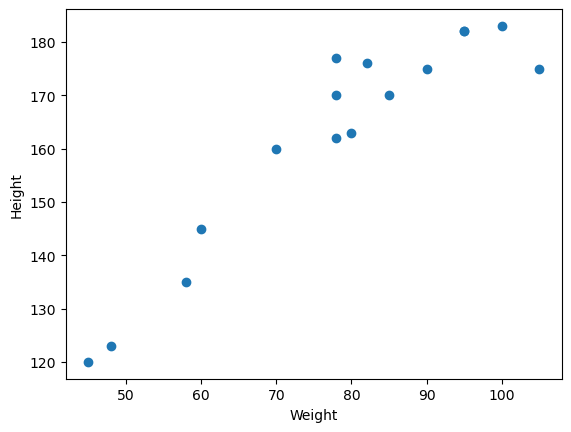

In [4]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [5]:
# independent and dependent feature
X=df[['Weight']] #independent feature should be in form of dataframe or 2 dimension
y=df['Height'] #dependent feature should be in series form or 1 d


In [6]:
X_series=df['Weight']
X_series
np.array(X_series).shape


(16,)

In [7]:
# Train and Test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [8]:
#standardization
from sklearn.preprocessing import StandardScaler

In [110]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
# X_test=scaler.transform(X_test)

In [11]:
X_test

array([[-1.08359047],
       [ 0.10835905],
       [ 0.9210519 ],
       [ 0.        ]])

In [12]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression

In [13]:
regression=LinearRegression()

In [14]:
regression.fit(X_train,y_train)

LinearRegression()

In [15]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)


Coefficient or slope: [19.40981422]
Intercept: 162.33333333333334


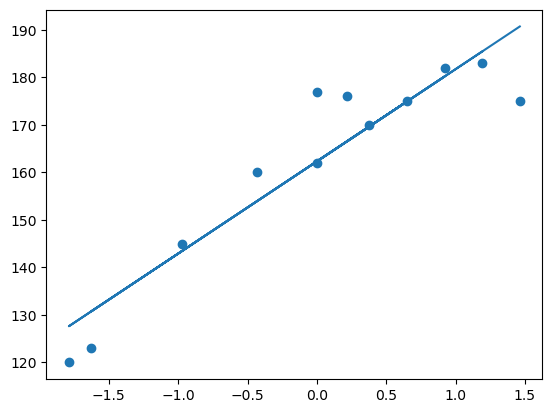

In [16]:
#plot train data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [17]:
#prediction of the data
y_pred=regression.predict(X_test)

In [18]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [19]:
mse=mean_squared_error(y_test,y_pred)
mae=mse=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

4.298373287671232
4.298373287671232
2.073251863057461


In [20]:
from sklearn.metrics import r2_score

In [21]:
score=r2_score(y_test,y_pred)
print(score)

0.9130377613424013


# Multiple Linear Regression

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
data=pd.read_csv("economic_index.csv")
data

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [24]:
data.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [25]:
data

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


/Users/anuragverma/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


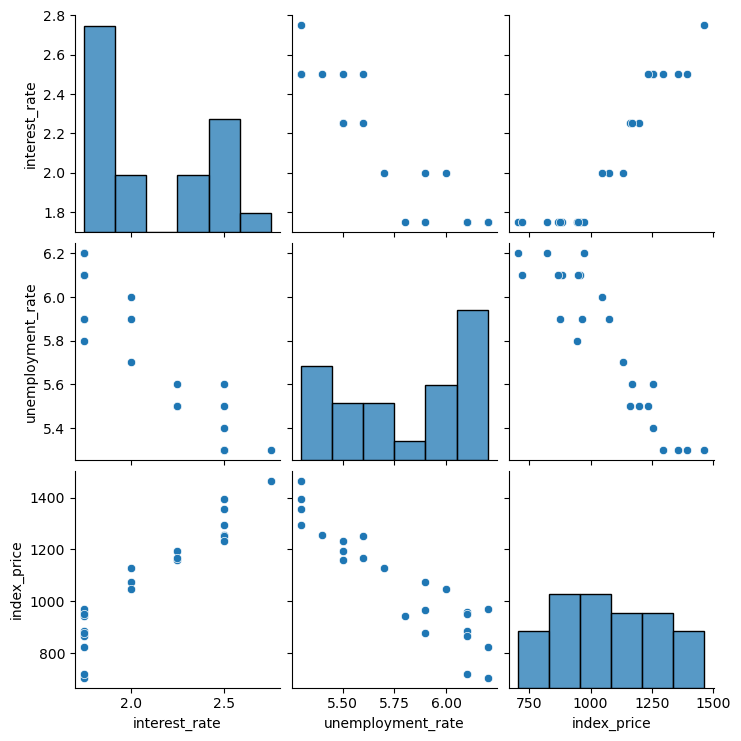

In [26]:
import seaborn as sns
sns.pairplot(data)

In [27]:
data.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [28]:
# dependent and independent features
X=data[["interest_rate","unemployment_rate"]]
y=data["index_price"]

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [30]:
X_train

,interest_rate,unemployment_rate
17,1.75,6.1
10,2.00,5.7
4,2.50,5.4
2,2.50,5.3
19,1.75,6.1
6,2.50,5.5
7,2.25,5.5
21,1.75,6.2
1,2.50,5.3
16,1.75,6.2


In [31]:
X_test

,interest_rate,unemployment_rate
13,1.75,5.9
18,1.75,6.1
3,2.50,5.3
14,1.75,5.8
20,1.75,5.9


In [32]:
y_train

17     949
10    1130
4     1256
2     1357
19     866
6     1234
7     1195
21     822
1     1394
16     971
0     1464
15     958
23     719
22     704
9     1167
8     1159
12    1047
11    1075
5     1254
Name: index_price, dtype: int64

In [33]:
y_test

13     965
18     884
3     1293
14     943
20     876
Name: index_price, dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [35]:
X_train

array([[-1.08989852,  0.98775691],
       [-0.35032452, -0.20382285],
       [ 1.12882347, -1.09750768],
       [ 1.12882347, -1.39540262],
       [-1.08989852,  0.98775691],
       [ 1.12882347, -0.79961274],
       [ 0.38924947, -0.79961274],
       [-1.08989852,  1.28565185],
       [ 1.12882347, -1.39540262],
       [-1.08989852,  1.28565185],
       [ 1.86839747, -1.39540262],
       [-1.08989852,  0.98775691],
       [-1.08989852,  0.98775691],
       [-1.08989852,  1.28565185],
       [ 0.38924947, -0.5017178 ],
       [ 0.38924947, -0.79961274],
       [-0.35032452,  0.68986197],
       [-0.35032452,  0.39196703],
       [ 1.12882347, -0.5017178 ]])

In [36]:
X_test

array([[-1.08989852,  0.39196703],
       [-1.08989852,  0.98775691],
       [ 1.12882347, -1.39540262],
       [-1.08989852,  0.09407209],
       [-1.08989852,  0.39196703]])

In [37]:
from sklearn.linear_model import LinearRegression
regression.fit(X_train,y_train)

LinearRegression()

In [38]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [39]:
np.mean(validation_score)

-6456.0388070378685

In [40]:
# prediction
y_pred=regression.predict(X_test)

In [41]:
y_pred

array([ 939.9534492 ,  879.40418038, 1347.13896333,  970.22808361,
        939.9534492 ])

In [42]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [43]:
mse=mean_squared_error(y_test,y_pred)
mae=mse=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

34.99257330985379
34.99257330985379
5.915452079922023


In [44]:
from sklearn.metrics import r2_score

In [45]:
score=r2_score(y_test,y_pred)
print(score)

0.9292315170243679


# ASSUMPTIONS

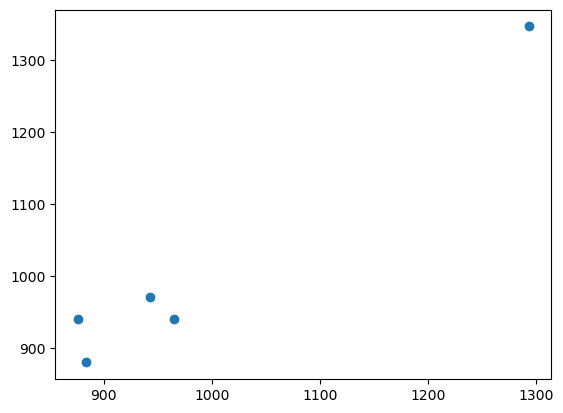

In [46]:
plt.scatter(y_test,y_pred)

In [47]:
residuals=y_test-y_pred
print(residuals)

13    25.046551
18     4.595820
3    -54.138963
14   -27.228084
20   -63.953449
Name: index_price, dtype: float64


/Users/anuragverma/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


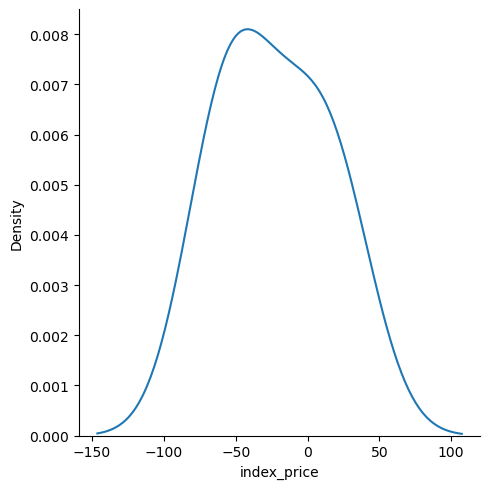

In [48]:
# plot this residuals
sns.displot(residuals,kind='kde')

# Data Cleaning

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [50]:
data=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [51]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [52]:
data.loc[:122,"Region"]=0
data.loc[122:,"Region"]=1

In [53]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [54]:
data[["Region"]]=data[["Region"]].astype(int)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [56]:
data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [57]:
# removing the null value
data=data.dropna().reset_index(drop=True)

In [58]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [59]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [60]:
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [61]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [62]:
# fix spaces in columns
data.columns=data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [63]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [64]:
data.to_csv("Algerian_forest_fires_dataset.csv",index=False)

# Explorartory Data Analysis

In [65]:
# drop day,month,year
df=data.drop(['day','month','year'],axis=1)

In [66]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [67]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

In [68]:
# encoding of the categories in classes
df["Classes"]=np.where(df['Classes']=='not fire',0,1)

In [69]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,1,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,1,0


In [70]:
df['Classes'].value_counts()

Classes
1    242
0      2
Name: count, dtype: int64

/var/folders/wm/jdbjtblj4ld0zn613jtfpr_c0000gn/T/ipykernel_28806/1784482201.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


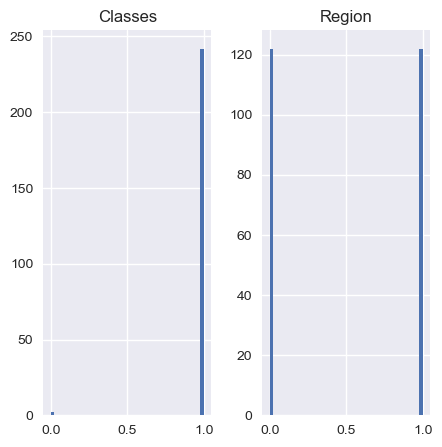

In [71]:
# plot desnity plot for all features
plt.style.use('seaborn')
df.hist(bins=40,figsize=(5,5))
plt.show()

In [72]:
percentage=df['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    99.180328
0     0.819672
Name: proportion, dtype: float64

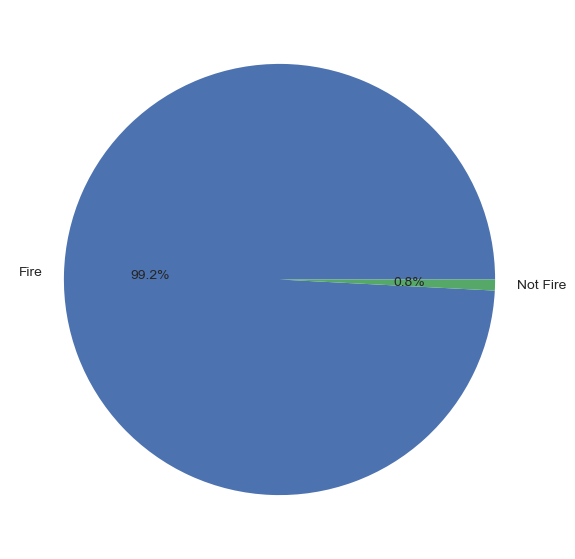

In [73]:
classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.show()

In [74]:
# correlation
df.corr

<bound method DataFrame.corr of     Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  FWI  Classes  \
0            29  57  18     0  65.7  3.4   7.6  1.3   3.4  0.5        1   
1            29  61  13   1.3  64.4  4.1   7.6    1   3.9  0.4        1   
2            26  82  22  13.1  47.1  2.5   7.1  0.3   2.7  0.1        1   
3            25  89  13   2.5  28.6  1.3   6.9    0   1.7    0        1   
4            27  77  16     0  64.8    3  14.2  1.2   3.9  0.5        1   
..          ...  ..  ..   ...   ...  ...   ...  ...   ...  ...      ...   
239          30  65  14     0  85.4   16  44.5  4.5  16.9  6.5        1   
240          28  87  15   4.4  41.1  6.5     8  0.1   6.2    0        1   
241          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4  0.2        1   
242          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1  0.7        1   
243          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8  0.5        1   

     Region  
0         0  
1         0  
2         0  
3         0

# Model Training

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
data=pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [77]:
data.drop(columns=["day","month","year"],axis=1,inplace=True)

In [78]:
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [79]:
data["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [80]:
# encoding
data["Classes"]=np.where(data["Classes"].str.contains("not fire"),0,1)

In [81]:
# independent and dependent features
X=data.drop("FWI",axis=1)
y=data["FWI"]

In [82]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [83]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [84]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4)

In [85]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [86]:
# feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664818,-0.235855,-0.250701,0.668095,0.448948,0.311670,0.609202,0.415420,0.523766,0.315730
RH,-0.664818,1.000000,0.229167,0.183044,-0.643988,-0.384796,-0.180585,-0.673178,-0.325724,-0.415444,-0.412660
Ws,-0.235855,0.229167,1.000000,0.138122,-0.139529,0.014909,0.096252,0.048344,0.047191,-0.036462,-0.168007
Rain,-0.250701,0.183044,0.138122,1.000000,-0.523092,-0.305833,-0.333598,-0.356732,-0.325547,-0.396345,0.032995
FFMC,0.668095,-0.643988,-0.139529,-0.523092,1.000000,0.595815,0.504017,0.728253,0.590707,0.769253,0.258363
DMC,0.448948,-0.384796,0.014909,-0.305833,0.595815,1.000000,0.858699,0.657396,0.980863,0.570048,0.240437
DC,0.311670,-0.180585,0.096252,-0.333598,0.504017,0.858699,1.000000,0.476962,0.930188,0.508209,-0.078162
ISI,0.609202,-0.673178,0.048344,-0.356732,0.728253,0.657396,0.476962,1.000000,0.622776,0.711186,0.293289
BUI,0.415420,-0.325724,0.047191,-0.325547,0.590707,0.980863,0.930188,0.622776,1.000000,0.582057,0.127547
Classes,0.523766,-0.415444,-0.036462,-0.396345,0.769253,0.570048,0.508209,0.711186,0.582057,1.000000,0.183995


<Axes: >

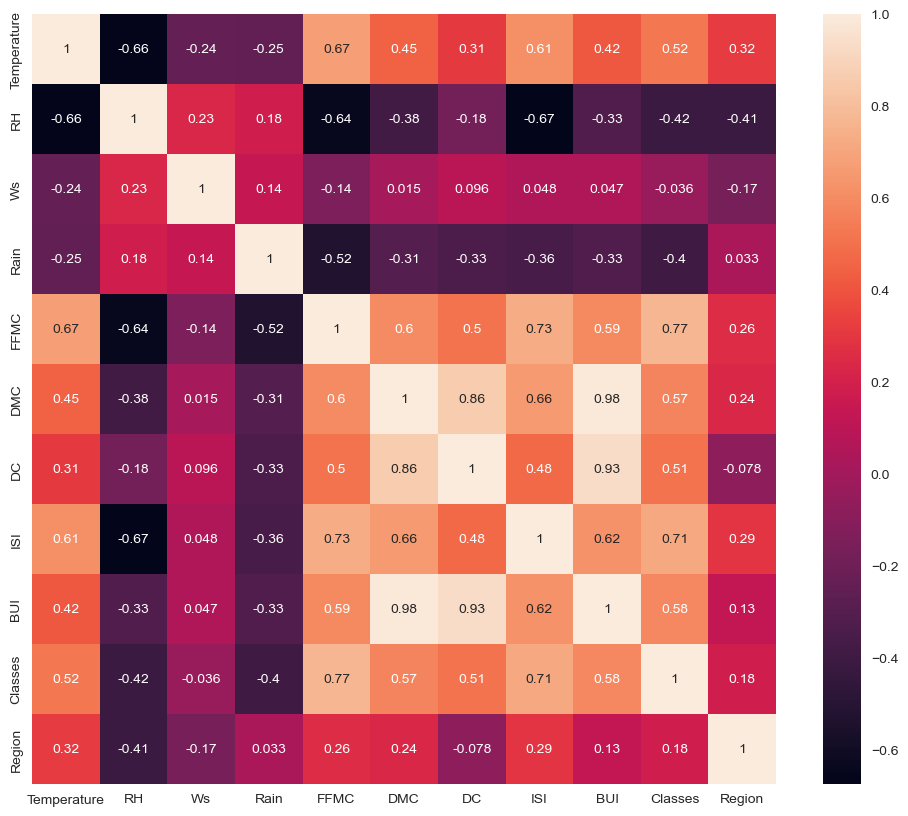

In [87]:
# check for multicollinarity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [88]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

            

In [89]:
# threshold
corr_features=correlation(X_train,0.85)

In [90]:
# drop the features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)


In [91]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [92]:
# Feature scaling or standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [93]:
X_train_scaled

array([[-0.91262417, -0.29012494, -0.50080191, ...,  0.69296783,
         0.84674738, -1.03352882],
       [-0.63671454, -0.48617472, -0.50080191, ..., -0.83618894,
        -1.18098977,  0.96755889],
       [ 0.466924  ,  0.55942409,  0.20575582, ...,  0.1283561 ,
         0.84674738,  0.96755889],
       ...,
       [ 2.1223818 , -1.79317323, -0.50080191, ...,  2.10449715,
         0.84674738,  0.96755889],
       [ 0.19101436,  0.10197461,  0.55903469, ..., -0.76561247,
        -1.18098977,  0.96755889],
       [-0.08489527,  0.62477401, -1.20735964, ..., -1.00086736,
        -1.18098977,  0.96755889]])

In [94]:
X_test_scaled

array([[-1.74035308e+00,  1.27827327e+00,  1.26559242e+00,
        -4.13785677e-01,  4.03861493e-01, -8.51117956e-02,
        -1.27968318e-02,  8.46747384e-01, -1.03352882e+00],
       [-6.36714540e-01,  1.01687357e+00, -1.47523042e-01,
         2.43934788e-01, -1.59004020e+00, -1.04201284e+00,
        -9.77341869e-01, -1.18098977e+00, -1.03352882e+00],
       [-3.60804906e-01,  4.28724236e-01, -5.00801907e-01,
        -4.13785677e-01,  5.03913907e-01, -2.24148699e-01,
        -5.98478092e-02,  8.46747384e-01, -1.03352882e+00],
       [ 1.91014362e-01, -4.86174720e-01, -8.54080772e-01,
        -4.13785677e-01,  7.04018736e-01, -4.04078810e-01,
         3.63610987e-01,  8.46747384e-01, -1.03352882e+00],
       [-6.36714540e-01,  7.55473864e-01, -5.00801907e-01,
        -4.13785677e-01,  6.08246429e-02, -6.82152618e-01,
        -6.47985027e-01, -1.18098977e+00,  9.67558894e-01],
       [ 1.91014362e-01,  1.08222349e+00,  5.59034687e-01,
        -4.13785677e-01,  1.25144052e-01, -8.375468

/var/folders/wm/jdbjtblj4ld0zn613jtfpr_c0000gn/T/ipykernel_28806/4113147525.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train After scaling')

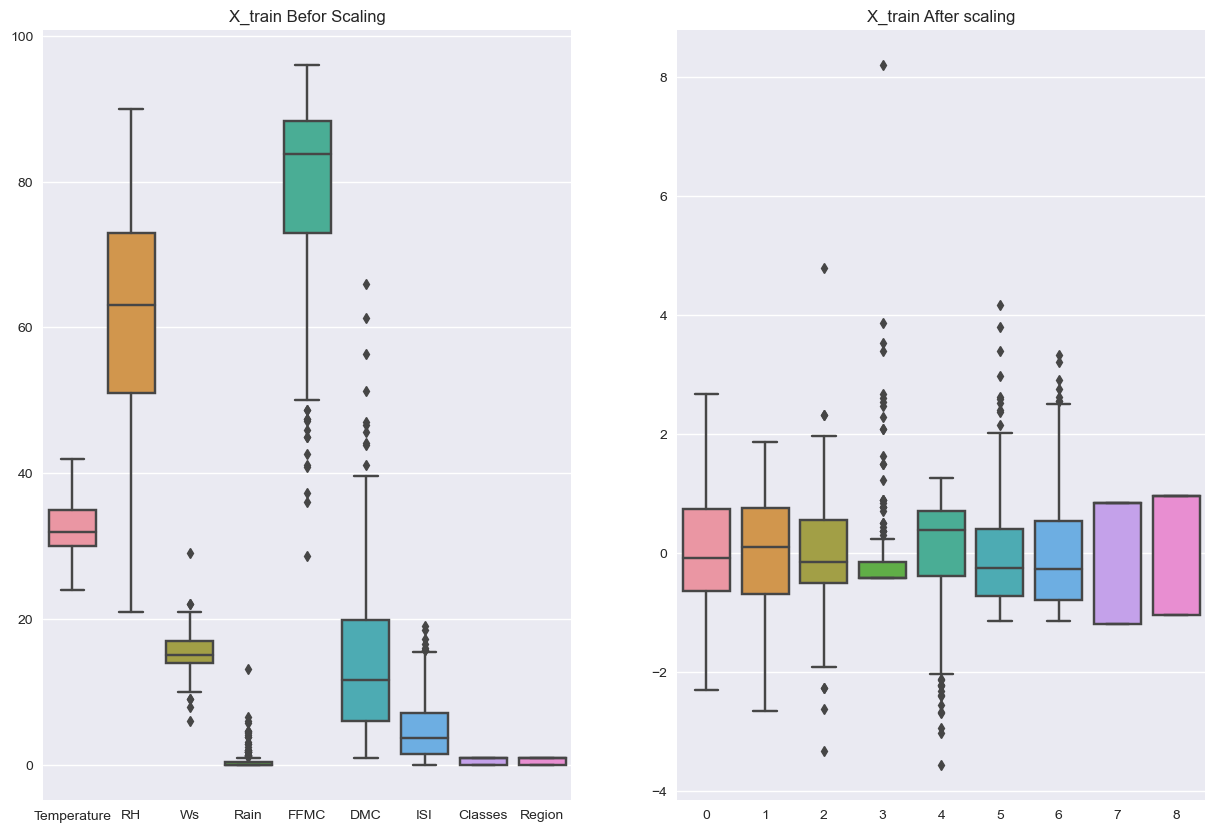

In [95]:
# Box plot to understand the effect of standardization
plt.subplots(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train Befor Scaling")

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After scaling")

-36.16244789664284


/Users/anuragverma/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


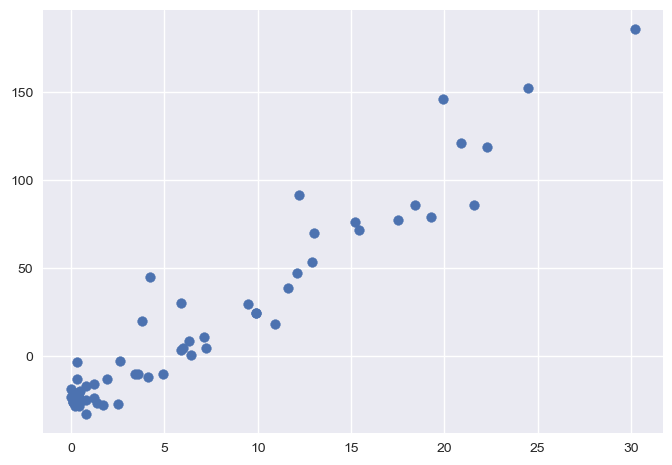

In [96]:
# Linear Model Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regeression=LinearRegression()
regression.fit(X_train_scaled,y_train)
y_pred=regression.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(score)
plt.scatter(y_test,y_pred)

# Lasso Regression

-36.16244789664284


/Users/anuragverma/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


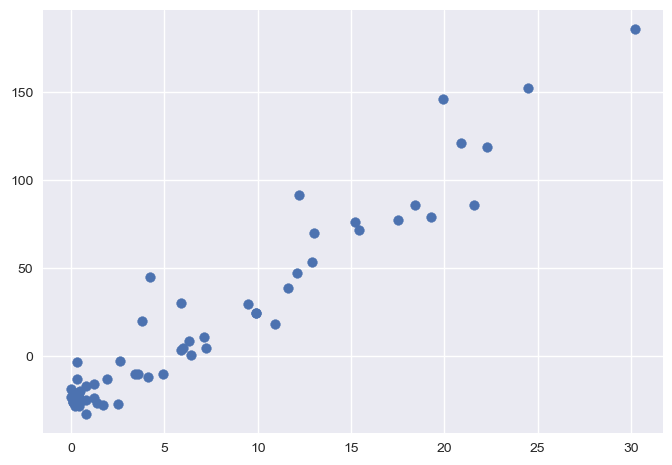

In [97]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=regression.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(score)
plt.scatter(y_test,y_pred)

-81.43202398783556


/Users/anuragverma/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


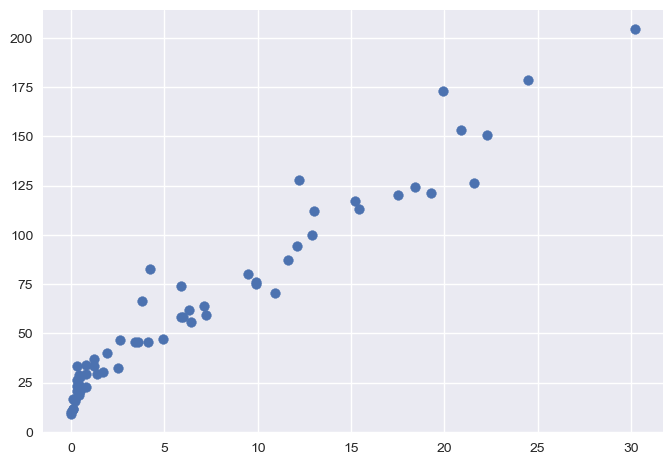

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regeression=LinearRegression()
regression.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(score)
plt.scatter(y_test,y_pred)

# Ridge Regression

-36.51628640452597


/Users/anuragverma/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


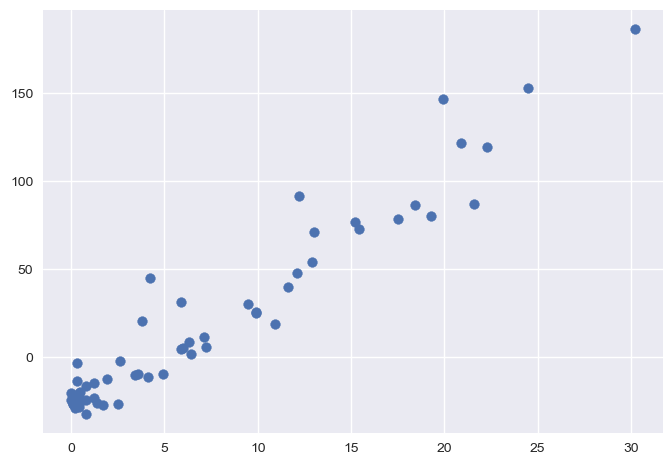

In [99]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(score)
plt.scatter(y_test,y_pred)

# Elastic Net

-75.60813177757255


/Users/anuragverma/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


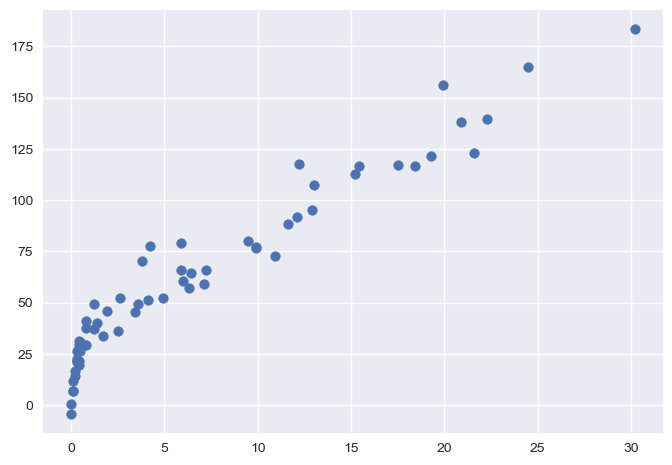

In [100]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(score)
plt.scatter(y_test,y_pred)

# Lasso CV

In [101]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=55)
lassocv.fit(X_train,y_train)

LassoCV(cv=55)

In [102]:
lassocv.predict(X_test)

array([ 6.97548064e+00, -3.06887533e-01,  6.07513487e+00,  7.36299699e+00,
        1.37938971e+00,  2.03256819e+00,  6.80383885e-01,  3.35546135e+00,
        1.09640473e+01,  9.54916002e+00,  1.36723463e+01,  1.15125765e+01,
        1.28431380e+01,  1.90123079e+01, -2.57192725e-01,  4.19447869e-01,
        8.66551356e-01,  4.70879986e+00,  1.62423667e+01,  1.46289582e+00,
        1.65727415e+00, -7.06124327e-01,  2.31854131e+00,  9.43435706e+00,
        3.32574249e-01,  1.16570452e+00,  1.87831532e+01,  7.46631274e-01,
       -1.35124454e-01, -1.52684630e-01,  1.65617206e+01,  3.74322296e+00,
        2.68543318e+01, -7.80851766e-01,  5.98576906e+00, -3.22575689e-01,
        6.54893812e+00,  2.42024632e-01,  1.64763817e+00,  1.91550516e+01,
        4.24455239e+00,  6.85005132e+00, -1.18203008e+00,  1.30624899e+01,
        9.91432877e+00,  6.85518836e+00,  5.89811746e+00,  3.78795916e+00,
        2.12851717e+00,  1.42110090e+01,  1.49021042e+00, -4.94278561e-01,
        1.31935279e+01,  

In [103]:
lassocv.alphas_

array([77.50315904, 72.27970551, 67.40829527, 62.86520178, 58.62829758,
       54.67694655, 50.99190335, 47.55521973, 44.35015708, 41.36110493,
       38.57350488, 35.97377976, 33.5492674 , 31.28815906, 29.17944186,
       27.21284514, 25.37879046, 23.66834492, 22.07317769, 20.58551939,
       19.19812428, 17.90423495, 16.69754944, 15.57219049, 14.52267697,
       13.54389715, 12.63108381, 11.77979104, 10.98587255, 10.24546151,
        9.55495169,  8.91097993,  8.3104097 ,  7.7503159 ,  7.22797055,
        6.74082953,  6.28652018,  5.86282976,  5.46769465,  5.09919033,
        4.75552197,  4.43501571,  4.13611049,  3.85735049,  3.59737798,
        3.35492674,  3.12881591,  2.91794419,  2.72128451,  2.53787905,
        2.36683449,  2.20731777,  2.05855194,  1.91981243,  1.7904235 ,
        1.66975494,  1.55721905,  1.4522677 ,  1.35438972,  1.26310838,
        1.1779791 ,  1.09858725,  1.02454615,  0.95549517,  0.89109799,
        0.83104097,  0.77503159,  0.72279706,  0.67408295,  0.62

0.6902057856792103
0.9827460115216692


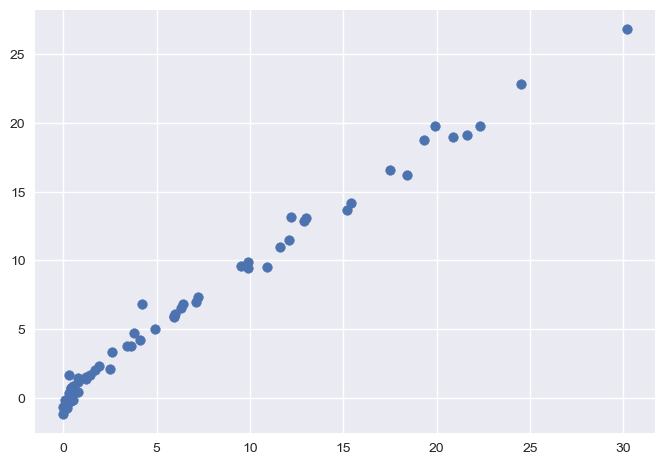

In [104]:
y_pred=lassocv.predict(X_test)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)

# Ridge CV

In [105]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train,y_train)

RidgeCV(cv=5)

0.6749038433543502
0.9836831376479431


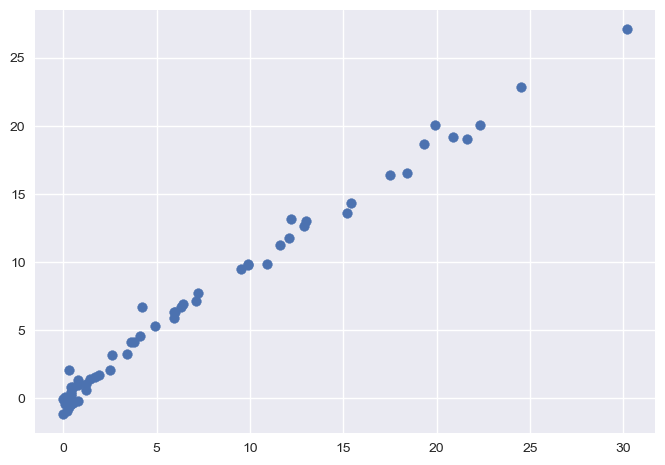

In [106]:
y_pred=ridgecv.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
plt.scatter(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)

# ElasticNetCV

In [107]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train,y_train)

ElasticNetCV(cv=5)

In [108]:
y_pred=elasticcv.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)

0.7051226777377858
0.9819574905384454


In [109]:
elasticcv.alphas_

array([155.00631808, 144.55941103, 134.81659055, 125.73040356,
       117.25659516, 109.35389309, 101.9838067 ,  95.11043945,
        88.70031416,  82.72220985,  77.14700977,  71.94755951,
        67.0985348 ,  62.57631813,  58.35888372,  54.42569028,
        50.75758091,  47.33668984,  44.14635537,  41.17103877,
        38.39624855,  35.80846991,  33.39509888,  31.14438099,
        29.04535395,  27.0877943 ,  25.26216763,  23.55958208,
        21.9717451 ,  20.49092301,  19.10990338,  17.82195985,
        16.62081941,  15.50063181,  14.4559411 ,  13.48165905,
        12.57304036,  11.72565952,  10.93538931,  10.19838067,
         9.51104395,   8.87003142,   8.27222099,   7.71470098,
         7.19475595,   6.70985348,   6.25763181,   5.83588837,
         5.44256903,   5.07575809,   4.73366898,   4.41463554,
         4.11710388,   3.83962486,   3.58084699,   3.33950989,
         3.1144381 ,   2.90453539,   2.70877943,   2.52621676,
         2.35595821,   2.19717451,   2.0490923 ,   1.91